# Manipulating Data

## WIP rebinning and removing outliers/errors

### Rebinning/smoothing

### Removing errors

First, sometimes things go wrong with the instrument, our measurement, or one of the samples we are working with. This can create outliers or errors in our data, but that often doesn't mean the entirity of the data is meaningless. While not verging on data manipulation, we can remove errors or outliers from our data through some simple means.

For example, if we have `na` data points that indicate an error or unuseable data, we can replace those with another value:


In [1]:
import numpy as np

# Create an array of floats
arr = np.random.rand(10)

# Insert NaN values in random places
nan_indices = np.random.choice(range(len(arr)), size=3, replace=False)
arr[nan_indices] = np.nan

print("Original array:", arr)

# Replace NaN values with zero
arr[np.isnan(arr)] = 0

print("Array with NaN replaced:", arr)


Original array: [0.10892081 0.6017608  0.83621498 0.79375598 0.67769405        nan
 0.84363239        nan 0.19418026        nan]
Array with NaN replaced: [0.10892081 0.6017608  0.83621498 0.79375598 0.67769405 0.
 0.84363239 0.         0.19418026 0.        ]


## WIP: Histograms using numpy

# Importing Data

## WIP: Multiple traces from a single File

Let's do a more applied example. I have a series of absorption spectrums of Yb-doped CsPbCl3 perovskite films that I want to visualize. Looking at the data in an excel file or text editor I can see the following things:
1. The first two rows are all header, so I want to skip those
2. The first scan was a baseline 100% transmittance scan, so I want to use that array of data as my background
2. Each absorption spectrum takes up two columns, so I want to extract one set of data for each experiment I did.

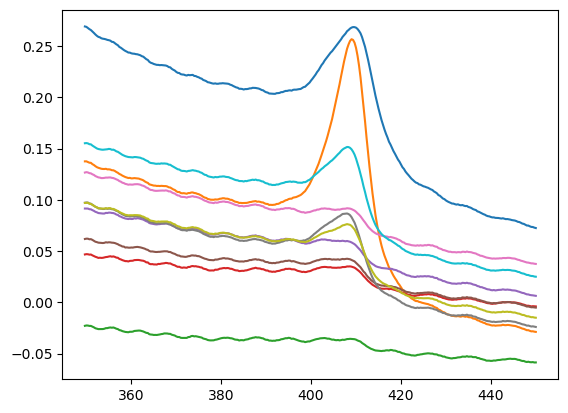

In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# define where our file can be found to be imported
filepath        = 'data/20-03-13ReesYbPerovAllSlideFilms.csv'

data = np.genfromtxt(filepath, delimiter=',', skip_header=2, unpack=False) # here, we specify unpack=False because we want to keep all of our data in one array.

# i know my first two columns corruspond to my background scan, so I will assign those to a new array called background
background = data[:,0:2]
# each entry has 2 columns, so we need to plot every other column. We will print what entry of the array we are plotting to make sure we are plotting the correct data

for i in range(2, len(data[0,:]), 2):
    wave = data[:,i]
    intensity = data[:,i+1]
    # subtract background
    intensity = intensity - background[:,1]
    #peaks, _ = find_peaks(intensity, height=0,prominence=0.005)
    plt.plot(wave, intensity, label='raw')
    #plt.scatter(wave[peaks], intensity[peaks], color='red')

